## Introduction to Apache Spark

Apache Spark is an open-source, distributed computing system that provides an interface for programming entire clusters with implicit data parallelism and fault tolerance. It's designed for fast processing of large datasets and is widely used in data science and big data projects.

### Key Features of Apache Spark

- **Speed**: Spark's in-memory computing capabilities make it faster than traditional disk-based processing.
- **Ease of Use**: APIs in Python (PySpark), Java, Scala, and R make it accessible to a wide range of developers.
- **Advanced Analytics**: Spark supports SQL queries, streaming data, machine learning (MLlib), and graph processing (GraphX).

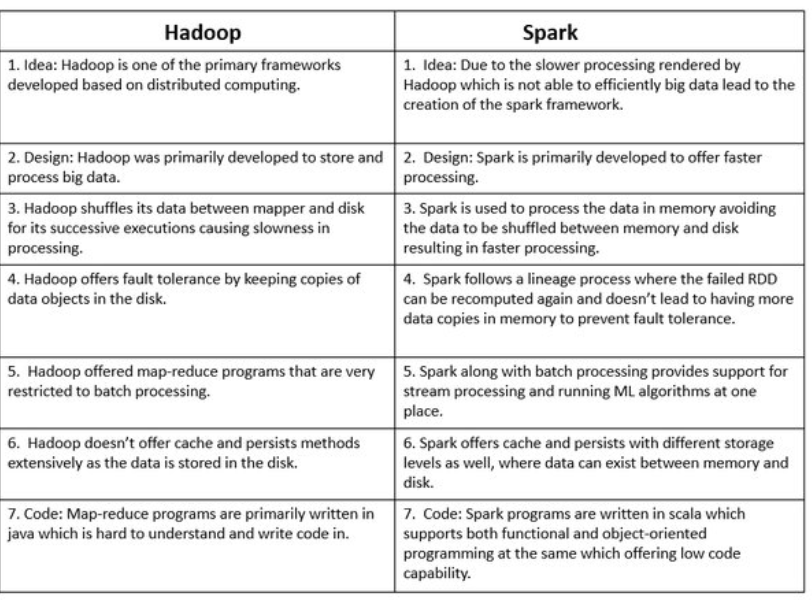

## PySpark Overview

PySpark is the Python API for Apache Spark, allowing you to leverage Spark's powerful distributed processing capabilities using Python.


In [1]:
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.0/317.0 MB 3.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.1-py2.py3-none-any.whl size=317488493 sha256=335d29b35e009044a2803cf2fe95a565d18a55f78b41823ec8f34d0a730e41d6
  Stored in directory: /root/.cache/pip/wheels/80/1d/60/2c256ed38dddce2fdd93be545214a63e02fbd8d74fb0b7f3a6
Successfully built pyspark


## 1. Initialize SparkSession:

In [2]:
from pyspark.sql import SparkSession

In [3]:
spark = SparkSession.builder \
    .appName("PySpark Tutorial") \
    .getOrCreate()

## 2. Create an RDD (Resilient Distributed Dataset):

In [4]:
rdd = spark.sparkContext.parallelize([1,2,3,4,5])
print(rdd.collect())

[1, 2, 3, 4, 5]


## 3. Basic RDD operations:

In [5]:
# Map
squared_rdd = rdd.map(lambda x:x**2)
print(squared_rdd.collect())

[1, 4, 9, 16, 25]


In [6]:
# Filter
even_rdd = rdd.filter(lambda x:x % 2 == 0)
print(even_rdd.collect())

[2, 4]


In [7]:
# Reduce
sum_rdd = rdd.reduce(lambda x, y: x + y)
print(sum_rdd)

15


## 4. Working with DataFrames

In [8]:
# Create a DataFrame

data = [("Alice",25),("Bob",30),("Charlie",35)]
df = spark.createDataFrame(data,["Name","Age"])
df.show()

+-------+---+
|   Name|Age|
+-------+---+
|  Alice| 25|
|    Bob| 30|
|Charlie| 35|
+-------+---+



In [9]:
# DataFrame operations

# Select columns
df.select("Name").show()

+-------+
|   Name|
+-------+
|  Alice|
|    Bob|
|Charlie|
+-------+



In [10]:
# Filter rows
df.filter(df.Age > 30).show()

+-------+---+
|   Name|Age|
+-------+---+
|Charlie| 35|
+-------+---+



In [11]:
# Add a new column

from pyspark.sql.functions import col
df = df.withColumn("Age_plus_10",col("Age") + 10)
df.show()

+-------+---+-----------+
|   Name|Age|Age_plus_10|
+-------+---+-----------+
|  Alice| 25|         35|
|    Bob| 30|         40|
|Charlie| 35|         45|
+-------+---+-----------+



In [12]:
# Group by and aggregate
df.groupBy("Age").count().show()

+---+-----+
|Age|count|
+---+-----+
| 25|    1|
| 35|    1|
| 30|    1|
+---+-----+



In [15]:
# Reading a csv file
df2 = spark.read.csv("/content/planets.csv", header=True , inferSchema=True)
df2.show()

+---------------+------+--------------+-----+--------+----+
|         method|number|orbital_period| mass|distance|year|
+---------------+------+--------------+-----+--------+----+
|Radial Velocity|     1|         269.3|  7.1|    77.4|2006|
|Radial Velocity|     1|       874.774| 2.21|   56.95|2008|
|Radial Velocity|     1|         763.0|  2.6|   19.84|2011|
|Radial Velocity|     1|        326.03| 19.4|  110.62|2007|
|Radial Velocity|     1|        516.22| 10.5|  119.47|2009|
|Radial Velocity|     1|        185.84|  4.8|   76.39|2008|
|Radial Velocity|     1|        1773.4| 4.64|   18.15|2002|
|Radial Velocity|     1|         798.5| NULL|   21.41|1996|
|Radial Velocity|     1|         993.3| 10.3|    73.1|2008|
|Radial Velocity|     2|         452.8| 1.99|   74.79|2010|
|Radial Velocity|     2|         883.0| 0.86|   74.79|2010|
|Radial Velocity|     1|         335.1| 9.88|   39.43|2009|
|Radial Velocity|     1|         479.1| 3.88|   97.28|2008|
|Radial Velocity|     3|        1078.0| 

## 5.SQL Operations

In [16]:
# Register DataFrame as a temporary view:
df.createOrReplaceTempView("people")

In [17]:
# Run SQL queries

result = spark.sql("SELECT * FROM people WHERE Age > 30")
result.show()

+-------+---+-----------+
|   Name|Age|Age_plus_10|
+-------+---+-----------+
|Charlie| 35|         45|
+-------+---+-----------+



## 6: User-Defined Functions (UDFs)

In [18]:
from pyspark.sql.functions import udf
from pyspark.sql.types import StringType

def age_category(age):
    return "Young" if age < 30 else "Adult"

age_category_udf = udf(age_category, StringType())

df = df.withColumn("AgeCategory", age_category_udf(df.Age))
df.show()

+-------+---+-----------+-----------+
|   Name|Age|Age_plus_10|AgeCategory|
+-------+---+-----------+-----------+
|  Alice| 25|         35|      Young|
|    Bob| 30|         40|      Adult|
|Charlie| 35|         45|      Adult|
+-------+---+-----------+-----------+



## 7.  Window Functions

In [19]:
## Use window functions for analytics:
from pyspark.sql.window import Window
from pyspark.sql.functions import row_number

windowSpec = Window.partitionBy("AgeCategory").orderBy("Age")

df = df.withColumn("row_number", row_number().over(windowSpec))
df.show()

+-------+---+-----------+-----------+----------+
|   Name|Age|Age_plus_10|AgeCategory|row_number|
+-------+---+-----------+-----------+----------+
|    Bob| 30|         40|      Adult|         1|
|Charlie| 35|         45|      Adult|         2|
|  Alice| 25|         35|      Young|         1|
+-------+---+-----------+-----------+----------+



## 8: Machine Learning with MLlib

In [20]:
# Prepare data for machine learning
from pyspark.ml.feature import VectorAssembler

assembler = VectorAssembler(inputCols=["Age"], outputCol="features")
vector_df = assembler.transform(df)

In [21]:
# Split data into training and test sets
(training_data, test_data) = vector_df.randomSplit([0.7, 0.3])

In [22]:
# Create and train a model (e.g., Linear Regression)
from pyspark.ml.regression import LinearRegression

In [26]:
lr = LinearRegression(featuresCol="features", labelCol="Age_plus_10")
model = lr.fit(training_data)
model

LinearRegressionModel: uid=LinearRegression_f2a9adfa7552, numFeatures=1

In [27]:
# Make predictions
predictions = model.transform(test_data)
predictions.select("Age", "Age_plus_10", "prediction").show()

+---+-----------+----------+
|Age|Age_plus_10|prediction|
+---+-----------+----------+
+---+-----------+----------+



In [28]:
from pyspark.ml.feature import VectorAssembler

assembler = VectorAssembler(inputCols=["Age"], outputCol="features")
vector_df = assembler.transform(df)

# Split data into training and test sets
(training_data, test_data) = vector_df.randomSplit([0.7, 0.3])

# Create and train a model (e.g., Linear Regression)
from pyspark.ml.regression import LinearRegression

lr = LinearRegression(featuresCol="features", labelCol="Age_plus_10")
model = lr.fit(training_data)
model


LinearRegressionModel: uid=LinearRegression_80a82ca4da88, numFeatures=1

In [29]:
# Make predictions
predictions = model.transform(test_data)
predictions.select("Age", "Age_plus_10", "prediction").show()

+---+-----------+-----------------+
|Age|Age_plus_10|       prediction|
+---+-----------+-----------------+
| 25|         35|35.00000000000026|
+---+-----------+-----------------+

